In [164]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

# === Step 1: Load Dataset (LOCAL PC VERSION) ===
df = pd.read_csv(r"/content/drive/MyDrive/GROUP 8 PROJECT/MATERNALDATASETS.csv")
df

,PatientID,Age,Location,ChronicalCondition,PreviousPregnancyComplication,GestationAge,Gravidity,Parity,AntenatalVisit,Systolic,Dystolic,PulseRate,SpecificComplication,DeliveryMode,StaffConductedDelivery,RiskLevel
0,1113.0,16,Chisala,No,No,39.0,1,0,6.0,136.0,89.0,109.0,No,Spontaneous Vertex Delivery,Skilled,High
1,NaN,25,Chisala,No,No,39.0,2,1,5.0,132.0,80.0,78.0,Yes,Caesarean Section,Skilled,High
2,3798.0,42,Katongo,No,No,38.0,4,3,3.0,111.0,57.0,82.0,Yes,Spontaneous Vertex Delivery,Skilled,High
3,3792.0,28,Chibako,No,No,38.0,2,1,6.0,138.0,83.0,98.0,Yes,Spontaneous Vertex Delivery,Skilled,High
4,996.0,33,Sahani,No,No,40.0,4,3,7.0,119.0,57.0,85.0,Yes,Caesarean Section,Skilled,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,1832.0,20,Vyalema,No,No,36.0,2,1,3.0,140.0,90.0,80.0,No,Spontaneous Vertex Delivery,Skilled,High
724,1637.0,20,Hiba,No,No,38.0,1,0,5.0,104.0,50.0,84.0,No,Spontaneous Vertex Delivery,Skilled,High
725,1687.0,39,Chintheche,No,No,39.0,6,5,4.0,109.0,84.0,68.0,No,Spontaneous Vertex Delivery,Skilled,High
726,1753.0,16,Kabunduli,No,No,37.0,1,0,0.0,111.0,65.0,84.0,No,Spontaneous Vertex Delivery,Skilled,Low


In [165]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [166]:
# === Step 4: Standardize Column Names ===
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
df.columns

Index(['patientid', 'age', 'location', 'chronicalcondition',
       'previouspregnancycomplication', 'gestationage', 'gravidity', 'parity',
       'antenatalvisit', 'systolic', 'dystolic', 'pulserate',
       'specificcomplication', 'deliverymode', 'staffconducteddelivery',
       'risklevel'],
      dtype='object')

In [167]:

# === Step 2: Initial Data Inspection ===
print("Initial Data Overview:")
print(df.head())



Initial Data Overview:
   patientid  age location chronicalcondition previouspregnancycomplication  \
0     1113.0   16  Chisala                 No                            No   
1        NaN   25  Chisala                 No                            No   
2     3798.0   42  Katongo                 No                            No   
3     3792.0   28  Chibako                 No                            No   
4      996.0   33   Sahani                 No                            No   

   gestationage  gravidity  parity  antenatalvisit  systolic  dystolic  \
0          39.0          1       0             6.0     136.0      89.0   
1          39.0          2       1             5.0     132.0      80.0   
2          38.0          4       3             3.0     111.0      57.0   
3          38.0          2       1             6.0     138.0      83.0   
4          40.0          4       3             7.0     119.0      57.0   

   pulserate specificcomplication                 deliver

In [168]:
print("\nData Info:")
print(df.info())


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 728 entries, 0 to 727
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   patientid                      632 non-null    float64
 1   age                            728 non-null    int64  
 2   location                       727 non-null    object 
 3   chronicalcondition             728 non-null    object 
 4   previouspregnancycomplication  728 non-null    object 
 5   gestationage                   718 non-null    float64
 6   gravidity                      728 non-null    int64  
 7   parity                         728 non-null    int64  
 8   antenatalvisit                 706 non-null    float64
 9   systolic                       707 non-null    float64
 10  dystolic                       707 non-null    float64
 11  pulserate                      720 non-null    float64
 12  specificcomplication           728 non

In [169]:
print("\nData describe:")
print(df.describe().T)


Data describe:
                count         mean          std   min      25%     50%  \
patientid       632.0  2257.800633  1113.043587   5.0  1701.25  2082.5   
age             728.0    23.659341     6.321022  12.0    19.00    22.0   
gestationage    718.0    37.515320     3.452675  17.0    37.00    38.0   
gravidity       728.0     2.122253     1.351610   1.0     1.00     2.0   
parity          728.0     1.057692     1.297324   0.0     0.00     1.0   
antenatalvisit  706.0     4.260623     1.832738   0.0     3.00     4.0   
systolic        707.0   121.050919    13.968102  76.0   111.00   120.0   
dystolic        707.0    74.806223    10.622712  39.0    68.00    75.0   
pulserate       720.0    89.919444    15.427038  38.0    79.75    89.0   

                    75%     max  
patientid       3285.25  6223.0  
age               28.00    45.0  
gestationage      39.00    89.0  
gravidity          3.00     8.0  
parity             2.00     6.0  
antenatalvisit     6.00    10.0  
systo

In [170]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
patientid                        96
age                               0
location                          1
chronicalcondition                0
previouspregnancycomplication     0
gestationage                     10
gravidity                         0
parity                            0
antenatalvisit                   22
systolic                         21
dystolic                         21
pulserate                         8
specificcomplication              0
deliverymode                      0
staffconducteddelivery            0
risklevel                         0
dtype: int64


In [171]:
print("\nData Description:")
print(df.describe(include='all'))


Data Description:
          patientid         age  location chronicalcondition  \
count    632.000000  728.000000       727                728   
unique          NaN         NaN       295                  3   
top             NaN         NaN  Mkondezi                 No   
freq            NaN         NaN        35                704   
mean    2257.800633   23.659341       NaN                NaN   
std     1113.043587    6.321022       NaN                NaN   
min        5.000000   12.000000       NaN                NaN   
25%     1701.250000   19.000000       NaN                NaN   
50%     2082.500000   22.000000       NaN                NaN   
75%     3285.250000   28.000000       NaN                NaN   
max     6223.000000   45.000000       NaN                NaN   

       previouspregnancycomplication  gestationage   gravidity      parity  \
count                            728    718.000000  728.000000  728.000000   
unique                             2           NaN      

In [172]:
# === Step 3: Drop Irrelevant Columns ===
df = df.drop(columns=["location", "patientid"], errors='ignore')
df


,age,chronicalcondition,previouspregnancycomplication,gestationage,gravidity,parity,antenatalvisit,systolic,dystolic,pulserate,specificcomplication,deliverymode,staffconducteddelivery,risklevel
0,16,No,No,39.0,1,0,6.0,136.0,89.0,109.0,No,Spontaneous Vertex Delivery,Skilled,High
1,25,No,No,39.0,2,1,5.0,132.0,80.0,78.0,Yes,Caesarean Section,Skilled,High
2,42,No,No,38.0,4,3,3.0,111.0,57.0,82.0,Yes,Spontaneous Vertex Delivery,Skilled,High
3,28,No,No,38.0,2,1,6.0,138.0,83.0,98.0,Yes,Spontaneous Vertex Delivery,Skilled,High
4,33,No,No,40.0,4,3,7.0,119.0,57.0,85.0,Yes,Caesarean Section,Skilled,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,20,No,No,36.0,2,1,3.0,140.0,90.0,80.0,No,Spontaneous Vertex Delivery,Skilled,High
724,20,No,No,38.0,1,0,5.0,104.0,50.0,84.0,No,Spontaneous Vertex Delivery,Skilled,High
725,39,No,No,39.0,6,5,4.0,109.0,84.0,68.0,No,Spontaneous Vertex Delivery,Skilled,High
726,16,No,No,37.0,1,0,0.0,111.0,65.0,84.0,No,Spontaneous Vertex Delivery,Skilled,Low


In [173]:


# Handle missing values
numerical_cols = ['age', 'gestationage', 'gravidity', 'parity', 'antenatalvisit',
                 'systolic', 'dystolic', 'pulserate']
for col in numerical_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df[col] = df[col].fillna(df[col].median())

categorical_cols = ['chronicalcondition', 'previouspregnancycomplication',
                   'specificcomplication', 'deliverymode', 'staffconducteddelivery', 'risklevel']
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

print(df[numerical_cols + categorical_cols].isnull().sum())



age                              0
gestationage                     0
gravidity                        0
parity                           0
antenatalvisit                   0
systolic                         0
dystolic                         0
pulserate                        0
chronicalcondition               0
previouspregnancycomplication    0
specificcomplication             0
deliverymode                     0
staffconducteddelivery           0
risklevel                        0
dtype: int64


In [174]:
# Fill categorical columns with mode and print the mode used
categorical_cols = ['chronicalcondition', 'previouspregnancycomplication',
                    'specificcomplication', 'deliverymode', 'staffconducteddelivery', 'risklevel']

for col in categorical_cols:
    mode_value = df[col].mode()[0]
    print(f"Filling missing values in '{col}' with mode: {mode_value}")
    df[col] = df[col].fillna(mode_value)


Filling missing values in 'chronicalcondition' with mode: No
Filling missing values in 'previouspregnancycomplication' with mode: No
Filling missing values in 'specificcomplication' with mode: No
Filling missing values in 'deliverymode' with mode: Spontaneous Vertex Delivery
Filling missing values in 'staffconducteddelivery' with mode: Skilled
Filling missing values in 'risklevel' with mode: High


In [175]:
# === Step 6: Standardize Categorical Text ===
df['chronicalcondition'] = df['chronicalcondition'].str.strip().str.capitalize().replace({'no': 'No', 'yes': 'Yes'})
df['previouspregnancycomplication'] = df['previouspregnancycomplication'].str.strip().str.capitalize().replace({'no': 'No', 'yes': 'Yes'})
df['specificcomplication'] = df['specificcomplication'].str.strip().str.capitalize().replace({'no': 'No', 'yes': 'Yes'})
df['deliverymode'] = df['deliverymode'].str.strip().str.title()
df['staffconducteddelivery'] = df['staffconducteddelivery'].str.strip().str.capitalize()
df['risklevel'] = df['risklevel'].str.strip().str.capitalize()

# Show cleaned values for verification
print("\nStandardized categorical column values:")
for col in ['chronicalcondition', 'previouspregnancycomplication', 'specificcomplication', 'deliverymode', 'staffconducteddelivery', 'risklevel']:
    print(f"{col}: {df[col].unique()}")



Standardized categorical column values:
chronicalcondition: ['No' 'Yes']
previouspregnancycomplication: ['No' 'Yes']
specificcomplication: ['No' 'Yes']
deliverymode: ['Spontaneous Vertex Delivery' 'Caesarean Section']
staffconducteddelivery: ['Skilled' 'Unskilled']
risklevel: ['High' 'Low']


In [176]:
# === Step 7: One-Hot Encode Categorical Variables ===
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
print("Data after one-hot encoding:")
print(df_encoded.head())
print("Columns after encoding:")
print(df_encoded.columns.tolist())


Data after one-hot encoding:
   age  gestationage  gravidity  parity  antenatalvisit  systolic  dystolic  \
0   16          39.0          1       0             6.0     136.0      89.0   
1   25          39.0          2       1             5.0     132.0      80.0   
2   42          38.0          4       3             3.0     111.0      57.0   
3   28          38.0          2       1             6.0     138.0      83.0   
4   33          40.0          4       3             7.0     119.0      57.0   

   pulserate  chronicalcondition_Yes  previouspregnancycomplication_Yes  \
0      109.0                   False                              False   
1       78.0                   False                              False   
2       82.0                   False                              False   
3       98.0                   False                              False   
4       85.0                   False                              False   

   specificcomplication_Yes  deliverymode_Spo

In [177]:
# === Step: Map selected boolean columns to 1/0 format ===
columns_to_map = [
    'chronicalcondition_Yes',
    'previouspregnancycomplication_Yes',
    'specificcomplication_Yes',
    'deliverymode_Spontaneous Vertex Delivery',
    'staffconducteddelivery_Unskilled'
]

# Check if all columns exist first (optional but safe)
for col in columns_to_map:
    if col in df_encoded.columns:
        df_encoded[col] = df_encoded[col].astype(int)
        print(f"\nMapped values for column: {col}")
        print(df_encoded[col].value_counts())
    else:
        print(f"\n Column '{col}' not found in DataFrame.")



Mapped values for column: chronicalcondition_Yes
chronicalcondition_Yes
0    708
1     20
Name: count, dtype: int64

Mapped values for column: previouspregnancycomplication_Yes
previouspregnancycomplication_Yes
0    637
1     91
Name: count, dtype: int64

Mapped values for column: specificcomplication_Yes
specificcomplication_Yes
0    561
1    167
Name: count, dtype: int64

Mapped values for column: deliverymode_Spontaneous Vertex Delivery
deliverymode_Spontaneous Vertex Delivery
1    603
0    125
Name: count, dtype: int64

Mapped values for column: staffconducteddelivery_Unskilled
staffconducteddelivery_Unskilled
0    719
1      9
Name: count, dtype: int64


In [178]:

# Print the first 5 rows of the entire DataFrame (numeric + encoded columns)
print("\nPreview of the full DataFrame with numeric and mapped columns:")
print(df_encoded.head())





Preview of the full DataFrame with numeric and mapped columns:
   age  gestationage  gravidity  parity  antenatalvisit  systolic  dystolic  \
0   16          39.0          1       0             6.0     136.0      89.0   
1   25          39.0          2       1             5.0     132.0      80.0   
2   42          38.0          4       3             3.0     111.0      57.0   
3   28          38.0          2       1             6.0     138.0      83.0   
4   33          40.0          4       3             7.0     119.0      57.0   

   pulserate  chronicalcondition_Yes  previouspregnancycomplication_Yes  \
0      109.0                       0                                  0   
1       78.0                       0                                  0   
2       82.0                       0                                  0   
3       98.0                       0                                  0   
4       85.0                       0                                  0   

   specifi

In [179]:
#SAVE THE MAPPED DATA

# Save to CSV
df_encoded.to_csv("final_maternal_data.csv", index=False)


print("Dataset saved successfully as both CSV")
print("- final_maternal_data.csv")



Dataset saved successfully as both CSV
- final_maternal_data.csv


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


/tmp/ipython-input-180-3052667968.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='risklevel', palette='viridis')


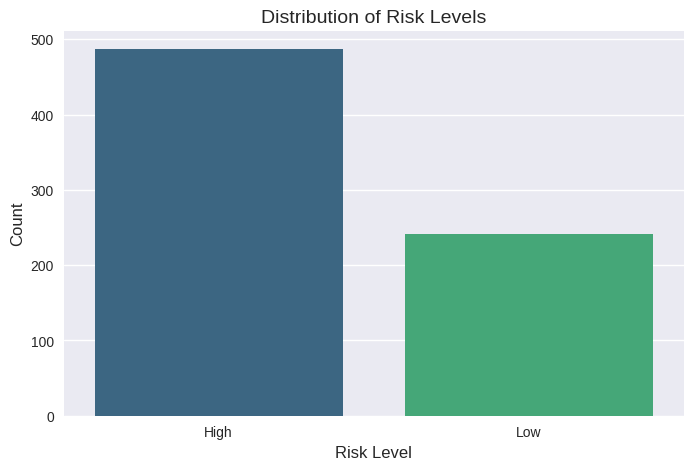

In [180]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check available styles and use the correct one
print(plt.style.available)  # See available styles (optional)
plt.style.use('seaborn-v0_8')  # Modern Matplotlib uses 'seaborn-v0_8' instead of 'seaborn'
plt.rcParams['figure.figsize'] = (12, 6)

# 1. Distribution of Risk Levels
plt.figure(figsize=(8, 5))  # Overrides global size for this plot
sns.countplot(data=df, x='risklevel', palette='viridis')
plt.title('Distribution of Risk Levels', fontsize=14)
plt.xlabel('Risk Level', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

/tmp/ipython-input-181-3933981940.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='risklevel', y='age', palette='coolwarm')


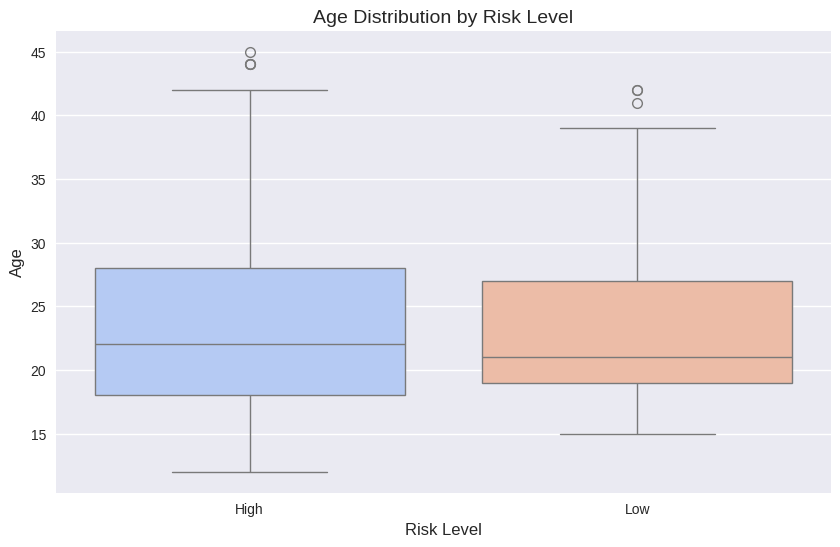

In [181]:
# 2. Age Distribution by Risk Level
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='risklevel', y='age', palette='coolwarm')
plt.title('Age Distribution by Risk Level', fontsize=14)
plt.xlabel('Risk Level', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.show()

/tmp/ipython-input-182-1213836955.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='risklevel', y='systolic', palette='Blues')
/tmp/ipython-input-182-1213836955.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='risklevel', y='dystolic', palette='Reds')


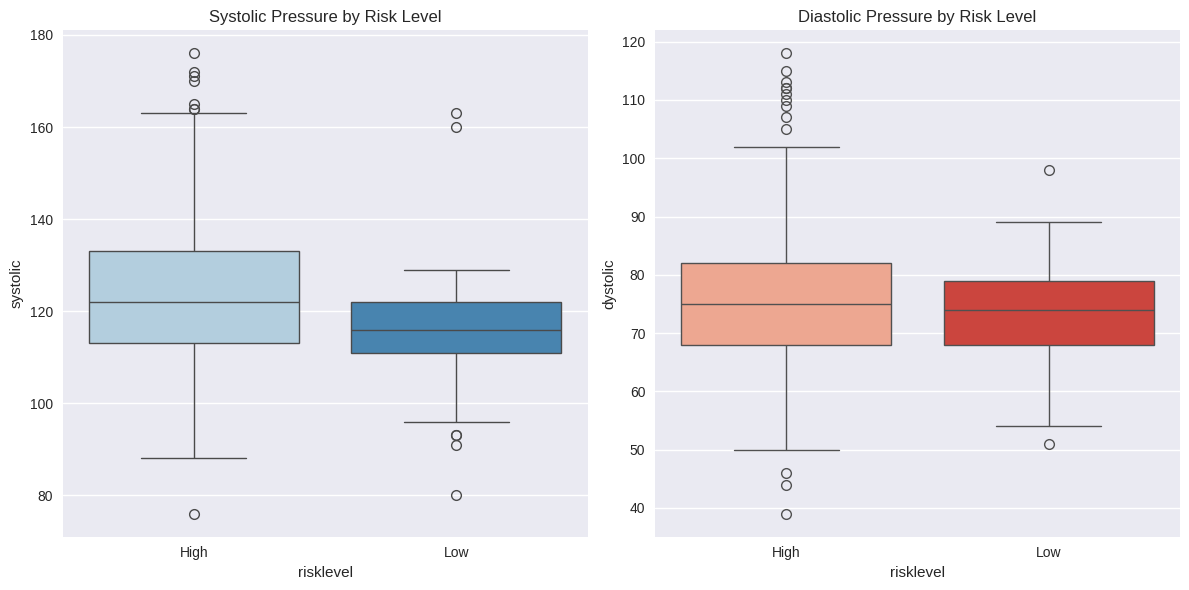

In [182]:
# 3. Blood Pressure vs Risk Level
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='risklevel', y='systolic', palette='Blues')
plt.title('Systolic Pressure by Risk Level')
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='risklevel', y='dystolic', palette='Reds')
plt.title('Diastolic Pressure by Risk Level')
plt.tight_layout()
plt.show()

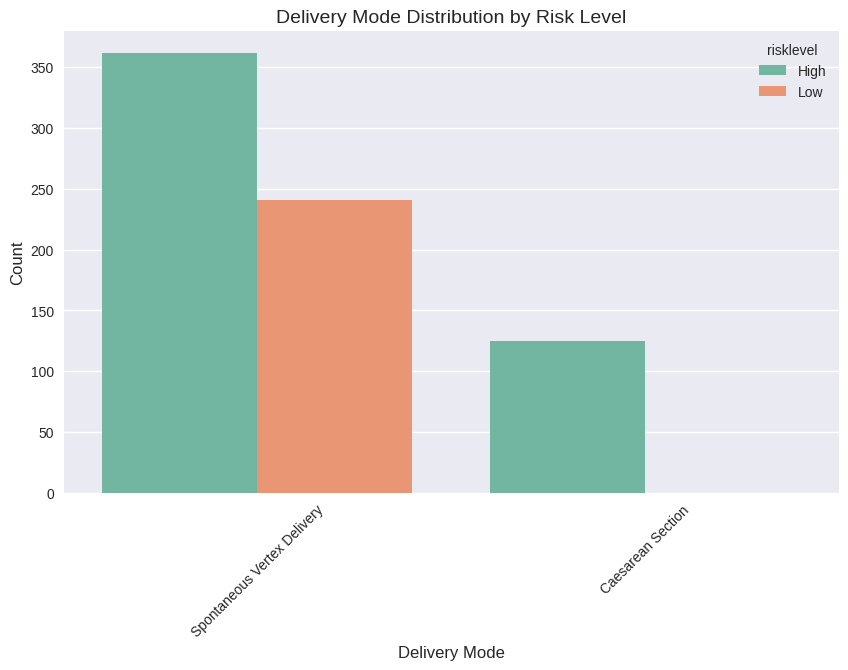

In [183]:
# 4. Delivery Mode Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='deliverymode', hue='risklevel', palette='Set2')
plt.title('Delivery Mode Distribution by Risk Level', fontsize=14)
plt.xlabel('Delivery Mode', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()

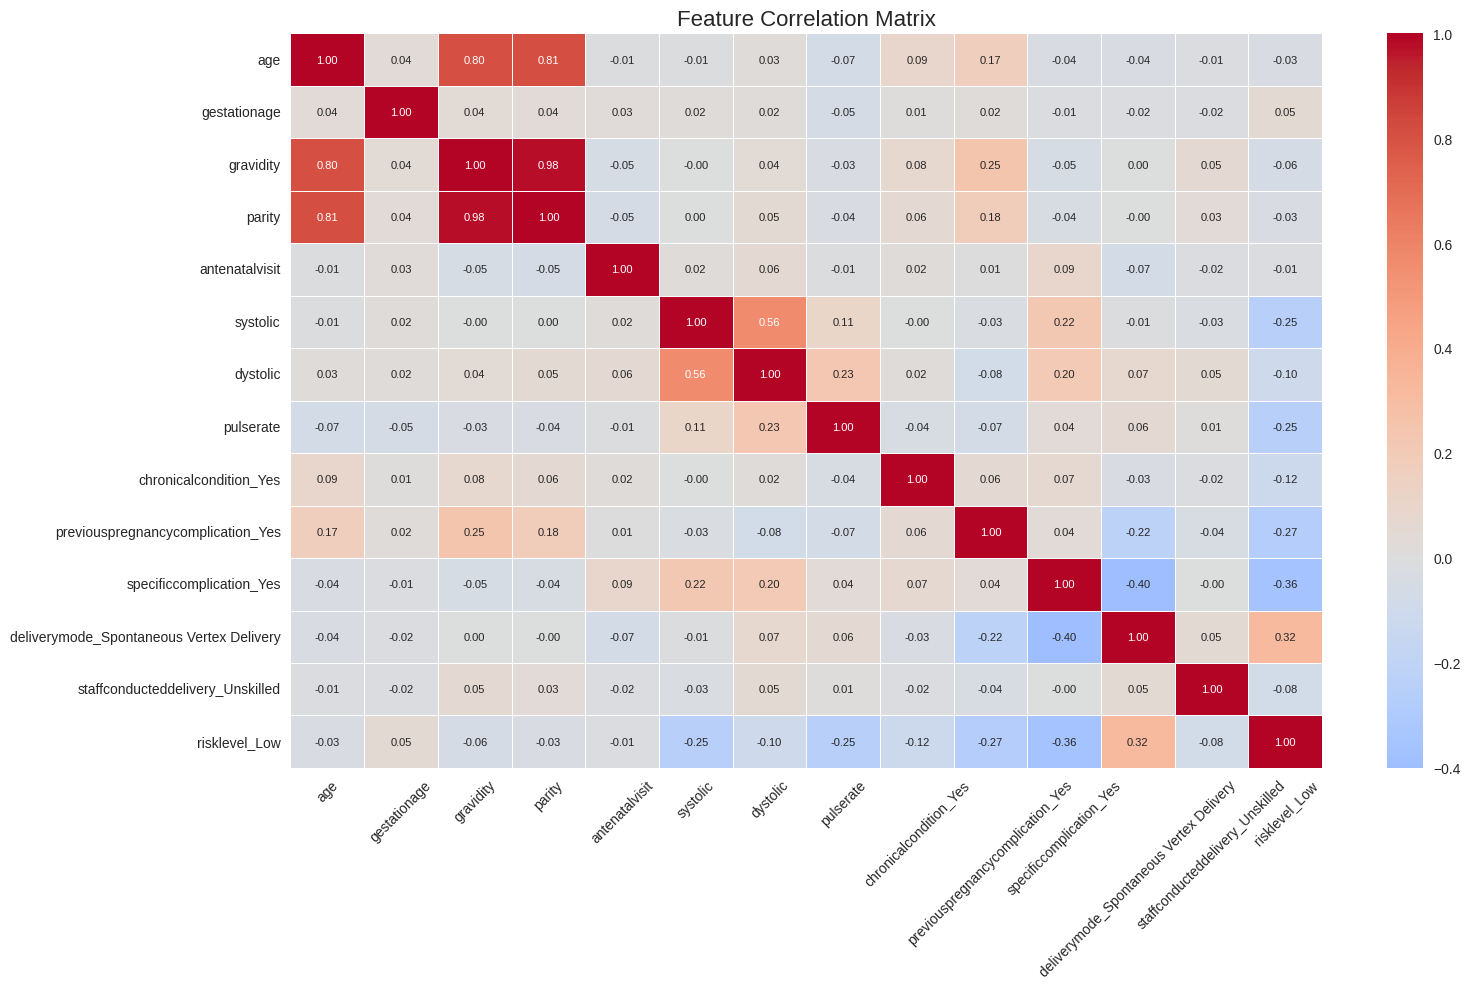


Top Correlations with Risk Level:
risklevel_Low                               1.000000
deliverymode_Spontaneous Vertex Delivery    0.320288
dystolic                                   -0.101190
chronicalcondition_Yes                     -0.118234
pulserate                                  -0.252863
systolic                                   -0.253343
previouspregnancycomplication_Yes          -0.265886
specificcomplication_Yes                   -0.362986
Name: risklevel_Low, dtype: float64


In [184]:
# Calculate correlation matrix
corr_matrix = df_encoded.corr()

# Plot heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f',
            annot_kws={'size': 8}, linewidths=0.5)
plt.title('Feature Correlation Matrix', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
# Top correlations with risk level
risk_corr = corr_matrix['risklevel_Low'].sort_values(ascending=False)
print("\nTop Correlations with Risk Level:")
print(risk_corr[abs(risk_corr) > 0.1])

In [185]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define features and target
X = df_encoded.drop('risklevel_Low', axis=1)
y = df_encoded['risklevel_Low']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

# Scale numerical features
scaler = StandardScaler()
num_cols = ['age', 'gestationage', 'gravidity', 'parity', 'antenatalvisit',
            'systolic', 'dystolic', 'pulserate']
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [186]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True),
    "XGBoost": XGBClassifier(random_state=42)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    # Store results
    results[name] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'report': classification_report(y_test, y_pred),
        'confusion_matrix': confusion_matrix(y_test, y_pred)
    }

    # Print basic metrics
    print(f"\n{name} Performance:")
    print(f"Accuracy: {results[name]['accuracy']:.4f}")
    print(classification_report(y_test, y_pred))


Logistic Regression Performance:
Accuracy: 0.8037
              precision    recall  f1-score   support

       False       0.84      0.88      0.86       147
        True       0.72      0.65      0.69        72

    accuracy                           0.80       219
   macro avg       0.78      0.77      0.77       219
weighted avg       0.80      0.80      0.80       219


Random Forest Performance:
Accuracy: 0.9315
              precision    recall  f1-score   support

       False       0.99      0.91      0.95       147
        True       0.84      0.97      0.90        72

    accuracy                           0.93       219
   macro avg       0.91      0.94      0.93       219
weighted avg       0.94      0.93      0.93       219


SVM Performance:
Accuracy: 0.8813
              precision    recall  f1-score   support

       False       0.91      0.92      0.91       147
        True       0.83      0.81      0.82        72

    accuracy                           0.88       2

In [187]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

# Get feature coefficients (weights)
feature_weights = dict(zip(X_train.columns, model.coef_))
print("Feature Weights:", feature_weights)

Feature Weights: {'age': np.float64(-0.005106496352242912), 'gestationage': np.float64(0.02143806121620526), 'gravidity': np.float64(-0.06917515028040741), 'parity': np.float64(0.04948916849308458), 'antenatalvisit': np.float64(0.018198259563330786), 'systolic': np.float64(-0.11615271715238208), 'dystolic': np.float64(0.052213453098698036), 'pulserate': np.float64(-0.14134853013782897), 'chronicalcondition_Yes': np.float64(-0.2808961636121879), 'previouspregnancycomplication_Yes': np.float64(-0.3108843465947562), 'specificcomplication_Yes': np.float64(-0.2314413678916792), 'deliverymode_Spontaneous Vertex Delivery': np.float64(0.25331976652213345), 'staffconducteddelivery_Unskilled': np.float64(-0.4636695408846755)}


/tmp/ipython-input-188-3913710037.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[x[0] for x in sorted_acc], y=[x[1] for x in sorted_acc], palette='viridis')


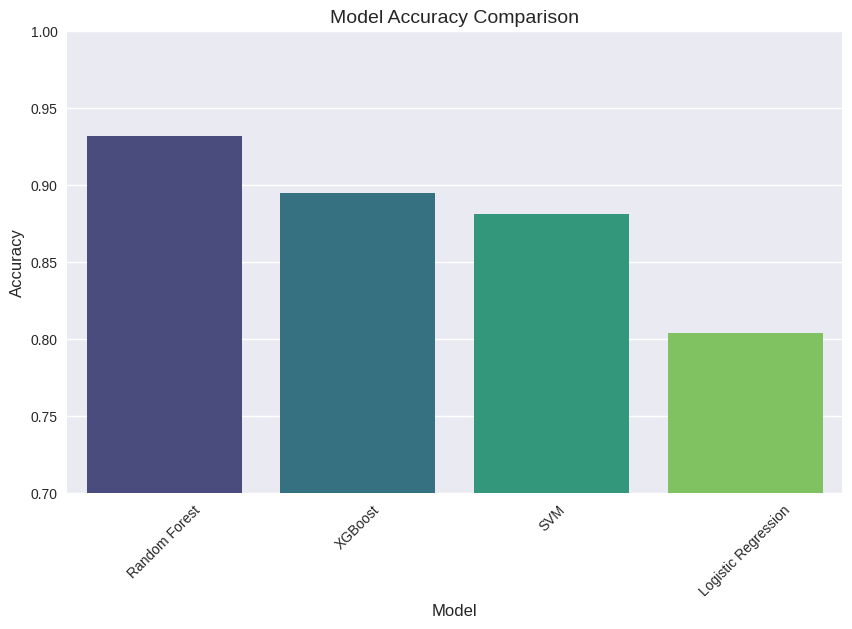

In [188]:
# Compare model accuracies
accuracies = {name: res['accuracy'] for name, res in results.items()}
sorted_acc = sorted(accuracies.items(), key=lambda x: x[1], reverse=True)

plt.figure(figsize=(10, 6))
sns.barplot(x=[x[0] for x in sorted_acc], y=[x[1] for x in sorted_acc], palette='viridis')
plt.title('Model Accuracy Comparison', fontsize=14)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.ylim(0.7, 1.0)
plt.xticks(rotation=45)
plt.show()

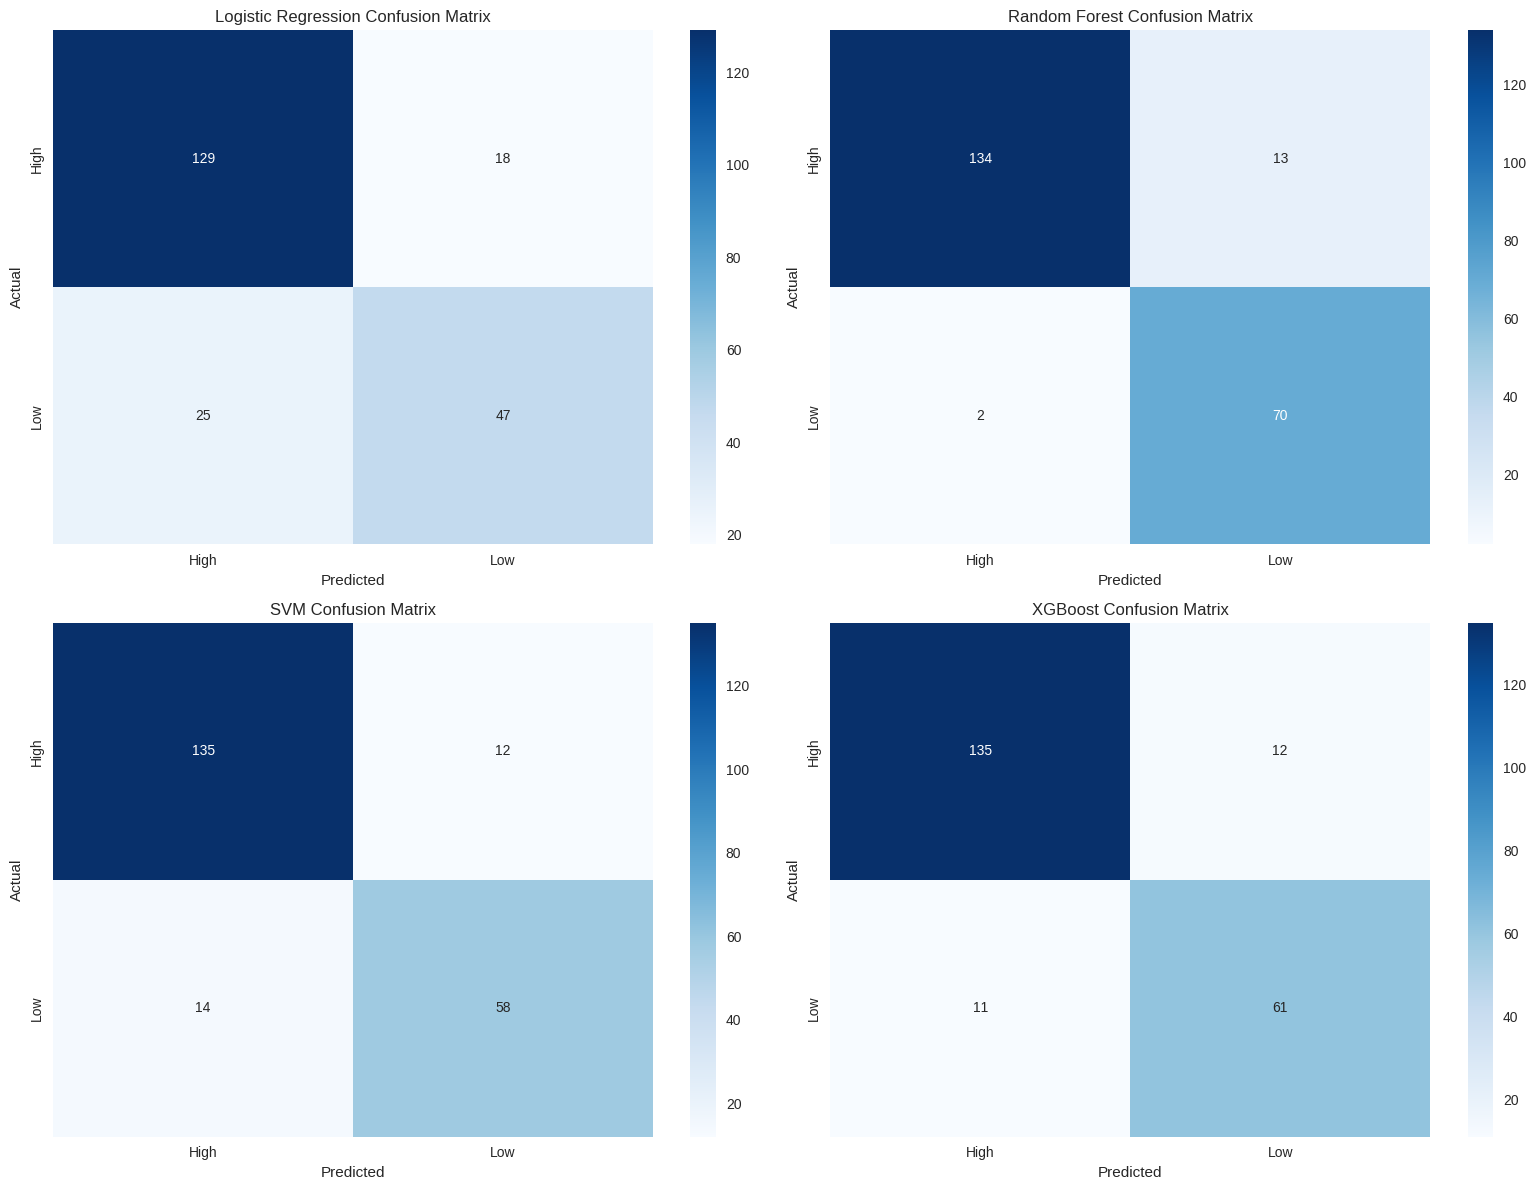

In [189]:
# Plot confusion matrices
plt.figure(figsize=(16, 12))
for i, (name, res) in enumerate(results.items(), 1):
    plt.subplot(2, 2, i)
    sns.heatmap(res['confusion_matrix'], annot=True, fmt='d', cmap='Blues',
                xticklabels=['High', 'Low'], yticklabels=['High', 'Low'])
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
plt.tight_layout()
plt.show()

In [190]:
# Get feature importance from best model (Random Forest)
best_model = results[sorted_acc[0][0]]
if hasattr(best_model, 'feature_importances_'):
    feature_imp = pd.Series(best_model.feature_importances_,
                           index=X.columns).sort_values(ascending=False)

    plt.figure(figsize=(12, 8))
    sns.barplot(x=feature_imp, y=feature_imp.index, palette='viridis')
    plt.title('Feature Importance', fontsize=14)
    plt.xlabel('Importance Score', fontsize=12)
    plt.ylabel('Features', fontsize=12)
    plt.tight_layout()
    plt.show()

In [191]:
# Select best performing model
best_model_name = sorted_acc[0][0]
best_model = models[best_model_name]

print(f"\nBest Performing Model: {best_model_name}")
print(f"Accuracy: {results[best_model_name]['accuracy']:.4f}")
print("\nClassification Report:")
print(results[best_model_name]['report'])

# Save the best model
import joblib
joblib.dump(best_model, 'maternal_risk_predictoR.pkl')
print("\nBest model saved as 'maternal_risk_predictoR.pkl'")


Best Performing Model: Random Forest
Accuracy: 0.9315

Classification Report:
              precision    recall  f1-score   support

       False       0.99      0.91      0.95       147
        True       0.84      0.97      0.90        72

    accuracy                           0.93       219
   macro avg       0.91      0.94      0.93       219
weighted avg       0.94      0.93      0.93       219


Best model saved as 'maternal_risk_predictoR.pkl'
